# Taller clasificación
**Integrantes:** María Fernanda Rodríguez, Dayana Valentina Gonzalez

**1** Esta pregunta debe responderse utilizando el dataset ``Weekly``. Esta información es similar a los datos de ``Smarket`` del anterior notebook, excepto que contiene 1,089 declaraciones semanales durante 21 años, desde el comienzo de 1990 hasta el final de 2010.


**(a)** Produzca algún resumen numérico y algunos gráficos de ``Weekly``. ¿Hay algún patrón?

In [126]:
# Importaremos la mayoria de modulos que se utilizaran a lo largo de la práctica

# Modulos basicos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Modulos de scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score 
from sklearn import preprocessing

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split

# Statmodels
import statsmodels.formula.api as smf

In [127]:
# weekly = pd.read_csv('weekly.csv')
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1
...,...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up,1


In [128]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Up
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.555556
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.000000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000


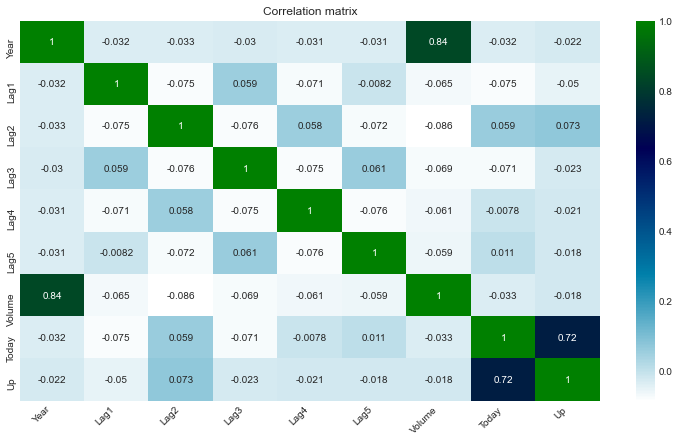

In [129]:
f,ax = plt.subplots(figsize=(13,7))
sns.heatmap(weekly.corr(),cmap = 'ocean_r', annot=True, cbar=True )
ax.set_title('Correlation matrix')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

plt.show()

Con esta matriz logramos ver las variables mas correlacionadas como **volume** con **year** y **volume** con **Lag2**

<Figure size 1080x1080 with 0 Axes>

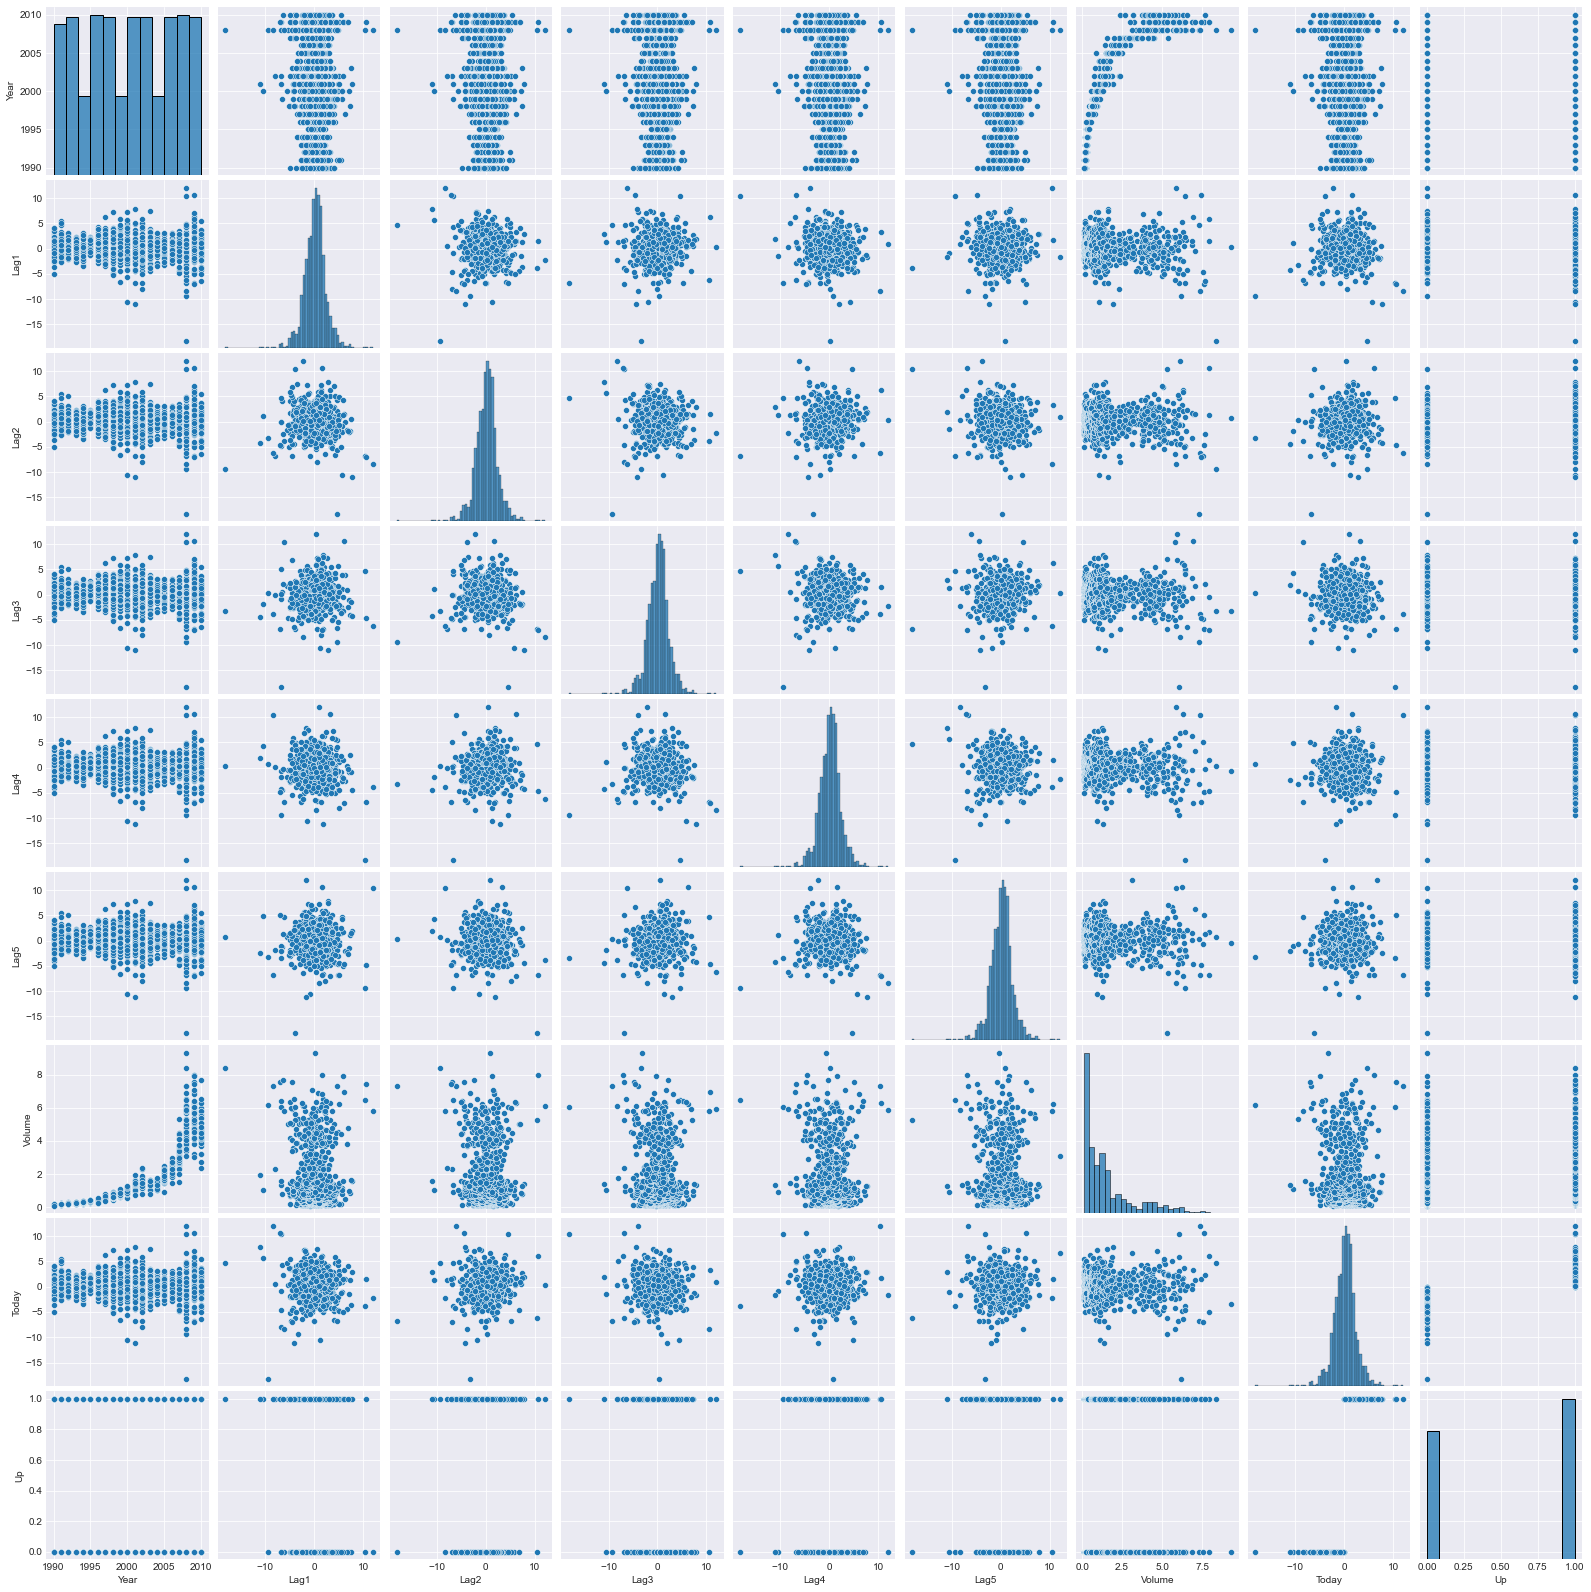

In [130]:
plt.figure(figsize=(15,15))
sns.pairplot(weekly)

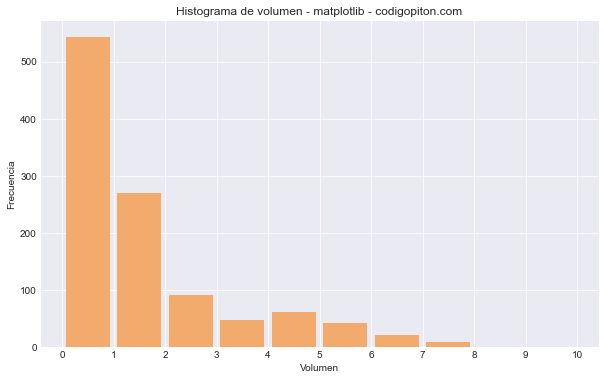

In [131]:
plt.figure(figsize=(10,6))
intervalos = range(int(min(weekly.Volume)), int(max(weekly.Volume)) + 2) #calculamos los extremos de los intervalos

plt.hist(x=weekly.Volume, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de volumen - matplotlib - codigopiton.com')
plt.xlabel('Volumen')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma


Realizamos el histograma de volumen para observar que aunque toma valores desde 0 hasta 10, la mayoria de los volumenes registrados son bajos, entre 0 y 2.

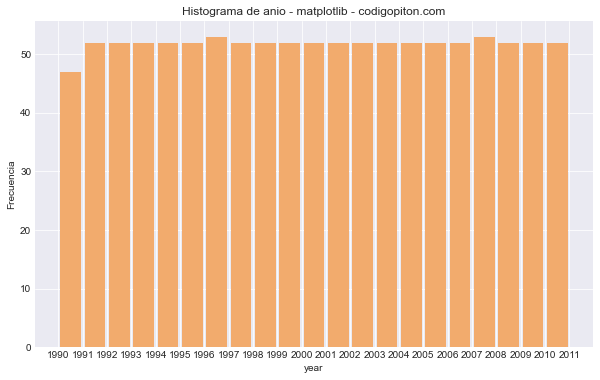

In [132]:
plt.figure(figsize=(10,6))

intervalos = range(int(min(weekly.Year)), int(max(weekly.Year)) + 2) #calculamos los extremos de los intervalos

plt.hist(x=weekly.Year, bins=intervalos, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de anio - matplotlib - codigopiton.com')
plt.xlabel('year')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma


En cuanto a los datos de **year** podemos encontrar registros de todos los años por igual, ya que las frecuencias de estos son muy similares.

**(b)** Utilice el conjunto de datos completo para realizar una regresión logística con ``Direction`` como respuesta y las cinco variables ``lag`` más ``Volume`` como predictores. Use la función ``summary`` (de statmodels) para imprimir los resultados. ¿Alguno de los predictores parece ser estadísticamente significativo? ¿De ser asi, cuales?

In [4]:
# Codifica la variable de salida categorica "Direction": # Up -> 1, Down -> 0.
# Esto se hace para statmodels, con scikit-learn no es necesario
# codificar la variable de salidad, pero si los predictores categoricos.
weekly['Up'] =  np.where(weekly['Direction'] == 'Up', 1, 0)

lrmodel = smf.logit('Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly)
results = lrmodel.fit()
results.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.2669,0.086,3.106,0.002,0.098,0.435
Lag1,-0.0413,0.026,-1.563,0.118,-0.093,0.010
Lag2,0.0584,0.027,2.175,0.030,0.006,0.111
Lag3,-0.0161,0.027,-0.602,0.547,-0.068,0.036
Lag4,-0.0278,0.026,-1.050,0.294,-0.080,0.024
Lag5,-0.0145,0.026,-0.549,0.583,-0.066,0.037
Volume,-0.0227,0.037,-0.616,0.538,-0.095,0.050


Basándonos en el análisis pertinente a la regresión sabemos que el único predictor que es estadísticamente significativo tomando un alpha de 0.05 sería la variable Lag2, debido a su coeficiente más alto que las otras variables y un valor p más pequeño.

**(c)** Calcule la matriz de confusión y la fracción general de las predicciones correctas. Explique qué le está diciendo la matriz de confusión sobre los tipos de errores cometidos por la regresión logística.

In [38]:
X = weekly.loc[:,'Lag1':'Volume']
y = weekly['Up']

# Dividiendo en training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [6]:
lrmodel = LogisticRegression(solver='lbfgs')
lrmodel.fit(X_train,y_train)

LogisticRegression()

In [7]:
# Matriz de confusion sobre el test
y_pred = lrmodel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Down','Up'], columns=['Down','Up'])
cm_df.index.name = 'True'; cm_df.columns.name = 'Predicted'
cm_df

Predicted,Down,Up
True,,
Down,30,121
Up,40,169


In [8]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.55


Según la matriz de confusión tenemos que 30 valores de "Down" estan bien clasificados pero 121 estaban incorrectos.  
Para los valores de "Up" tenemos 169 bien clasificados y 40 incorrectos.  
* Down tuvo  correctamente 30/151 en el test, esto es el 19.86%  
* Up tuvo correctamente 169/209 en el test, esto es el 80.86%

**(d)** Ahora ajuste el modelo de regresión logística utilizando un período de datos de capacitación de 1990 a 2008, con ``Lag2`` como el único predictor. Calcule la matriz de confusión y la fracción general de las predicciones correctas para los datos retenidos (es decir, los datos de 2009 y 2010).

In [9]:
# Funcion para calcular la matriz de confusion 
def miCM(ytrue, ypred, clases=None, normalize = False):
    """ Funcion para calcular la matriz de confusion en forma de dataframe"""
    
    from sklearn.metrics import confusion_matrix
    CM = confusion_matrix(ytrue,ypred)
    
    #Normaliza la matriz de confusion dividiendo cada fila por el total de verdaderos
    if normalize:
        CM = 100*CM / CM.sum(axis=1).reshape(-1,1) #Aprovechando el Broadcasting!
    if clases == None:
        clases = list(set(ytrue))    
    df = pd.DataFrame(CM, index=clases, columns=clases)
    df.index.name = 'True'; df.columns.name = 'Predicted'
    
    return df

In [10]:
# Tomando de nuevo los datos
X = weekly[['Lag2']]
y = weekly['Direction'] # No es necesario para sklearn codificar la variable de salida

# Dividiendo en training y test
idx_train = weekly['Year'].values < 2009
X_train = X[idx_train]
X_test = X[~idx_train]
y_train = y[idx_train]
y_test = y[~idx_train]

# Creacion del modelo y prediccion con preprocesamiento
scaler = preprocessing.StandardScaler().fit(X_train)
lrmodel = LogisticRegression(solver='lbfgs')
lrmodel.fit( scaler.transform(X_train),y_train )
y_pred = lrmodel.predict( scaler.transform(X_test) )

# matriz de confusion sin normalizacion
miCM(y_test,y_pred)


Predicted,Up,Down
True,,
Up,9,34
Down,5,56


In [11]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.62


Notamos una mejora en el accuracy ya que ahora tenemos una precisión del 62%

**(e)** Repetir (d) usando LDA.

In [12]:
# Funcion para calcular y visualizar la matriz de confusion 
def plotCM(ytrue, ypred, clases=None, normalize = False, ax = None):
    """ Funcion para calcular y visualizar la matriz de confusion"""
    
    if clases == None:
        clases = list(set(ytrue))
        clases.sort() # etiquetas unicas ordenadas alfabeticamente
    
    CM = confusion_matrix(ytrue,ypred, labels=clases)
    
    #Normaliza la matriz de confusion dividiendo cada fila por el total de verdaderos
    if normalize:
        CM = 100*CM / CM.sum(axis=1).reshape(-1,1) #Aprovechando el Broadcasting!
 
    df = pd.DataFrame(CM, index=clases, columns=clases)
    df.index.name = 'True'; df.columns.name = 'Predicted'
    
    sns.heatmap( df, # Visualizando la matriz de confusion
             annot=True, fmt='2.1f', cmap='ocean_r',cbar=False,square=True, annot_kws={'fontsize':16}, ax=ax )
    
    plt.show()

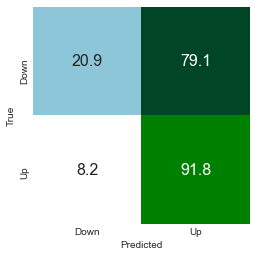

In [13]:

model = LinearDiscriminantAnalysis().fit( X_train, y_train )
y_pred = model.predict(X_test)
plotCM(y_test,y_pred, normalize=True)

In [14]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.62


**(f)** Repetir (d) usando QDA.

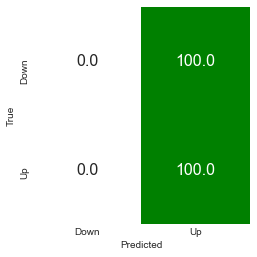

In [15]:
model = QuadraticDiscriminantAnalysis().fit( X_train, y_train )
y_pred = model.predict(X_test)
plotCM(y_test,y_pred, normalize=True)

In [16]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.59


**(g)** Repetir (d) usando KNN con K = 1.

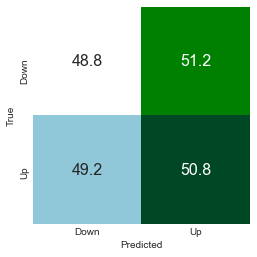

In [17]:
model = KNeighborsClassifier(n_neighbors=1).fit( X_train, y_train )
y_pred = model.predict(X_test)
plotCM(y_test,y_pred, normalize=True)

In [18]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.50


**(h)** ¿Cuál de estos métodos parece proporcionar los mejores resultados en estos datos?

El método que proporciona mejores resultados es el LDA, debido a que tiene una presicion del 62%, en comparación a los otros métodos que tienen un accuracy bajo.

**(i)** Experimentar con diferentes combinaciones de predictores, incluidas posibles transformaciones e interacciones, para cada uno de los métodos. Realice un informe sobre las variables, el método y la matriz de confusión correspondiente, que parecen proporcionar los mejores resultados. Tenga en cuenta que también debe experimentar con valores para K en el clasificador KNN.

* Tomamos las variables de Lag1, Lag2, Lag3, Lag4, Lag5, Volumen, y el predictor Direction, con una división del 33% para el train y 77% para el test, nuestra semilla aleatoria es 42.

In [24]:
X = weekly.loc[:,'Lag1':'Volume']
y = weekly['Direction']

# Dividiendo en training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


### Regresion logística
* Hacemos un modelo mediante regresion logística para poder determinar una buena clasificación de la variable y con respecto a las otras variables.

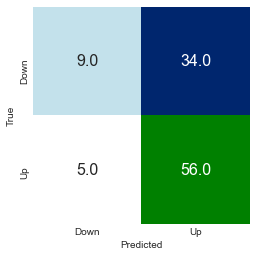

In [19]:
# Creacion del modelo y prediccion con preprocesamiento
scaler = preprocessing.StandardScaler().fit(X_train)
lrmodel = LogisticRegression(solver='lbfgs')
lrmodel.fit( scaler.transform(X_train),y_train )
y_pred = lrmodel.predict( scaler.transform(X_test) )

# matriz de confusion sin normalizacion
plotCM(y_test,y_pred)

* Obtenemos que 30 están bien clasificados como Down pero 121 estan mal, por otro lado 40 están mal clasificados como Up pero 169 estan bien.

In [20]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.62


* La precisión no es tan buena, debido a que es del 55%, disminuyó en comparación a la anterior, debido a que ahora involucramos más variables.

### LDA

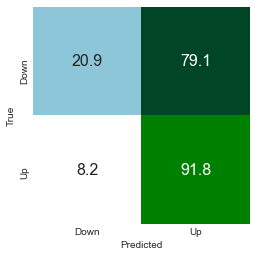

In [21]:

model = LinearDiscriminantAnalysis().fit( X_train, y_train )
y_pred = model.predict(X_test)
plotCM(y_test,y_pred, normalize=True)

* Realizando un modelo de análisis discriminante lineal obtuvimos la matriz de confusión en donde 19.9 están bien clasificados como Down pero 30 están mal clasificados y 19.1 están mal clasificados como Up y el 80.9 están bien clasificados como Up utilizando el 33% de la base de datos.

In [22]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.62


* Obtuvimos una precisión del 0.55, la cual es peor por lo que involucramos más variables.

### QDA

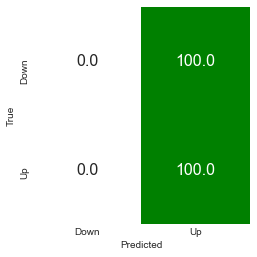

In [23]:
model = QuadraticDiscriminantAnalysis().fit( X_train, y_train )
y_pred = model.predict(X_test)
plotCM(y_test,y_pred, normalize=True)

* Realizando un análisis discriminante cuadrático obtenemos en la matriz de confusión que 31.1 están bien clasificados como Down pero 68.9 están mal, 25.4 están mal clasificados como Up pero 74.6 están bien clasificados.

In [30]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.56


* Obtenemos una precisión del 56%, la cual disminuye en comparación al análisis anterior, debido al aumento de variables.

### KNN

In [24]:
acc=[]
for i in range(20):
    model = KNeighborsClassifier(n_neighbors=i+1).fit( X_train, y_train )
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

* Tomamos un rango de vecinos de 1 a 20 para observar su accuracy, obteniendo la siguiente gráfica:

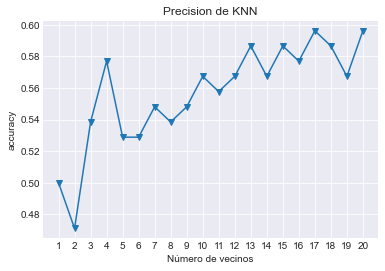

In [25]:
plt.plot(range(1,21), acc, '-v')
plt.xlabel('Número de vecinos')
plt.ylabel('accuracy')
plt.title('Precision de KNN')
plt.xticks(range(1,21))
plt.show()

* Nos podemos dar cuenta que el número de vecinos con la mayor precisión fueron 13, obteniendo así la siguiente matriz de confusión:

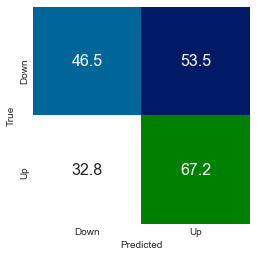

In [26]:
model = KNeighborsClassifier(n_neighbors=13).fit( X_train, y_train )
y_pred = model.predict(X_test)
plotCM(y_test,y_pred, normalize=True)

* Según esta matriz de confusión tenemos 39.7 bien clasificados en Down y 60.3 mal. 31.6 mal clasificados como Up y 68.4 bien clasificados.

In [27]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.59


* Obtuvimos una precisión del 56%, la cual aumentó en comparación al anterior en el que sólo usabamos 1 vecino.

**2.** Para este ejercicio debe cargar el dataset `RBC_Drepanocitos_Esferocitos.csv`. Haga un análisis completo de los descriptores mediante resúmenes numéricos y/o gráficas. Realice una división para los conjuntos de training y test (proporciones del 70% y 30% respectivamente), asegurese de que el test tiene proporciones similares al training (estratificado) [Para esto use `sklearn.model_selection.train_test_split` con el parámetro `stratify = y`, donde `y` es el vector de etiquetas]. Realice diferentes modelos utilizando los clasificadores vistos hasta ahora (Regresión logística, LDA, QDA, KNN y Naive Bayes) y si es necesario con preprocesamiento de los datos. ¿Cúal es el mejor? Para contestar esta pregunta calcule diferentes parámetros de desempeño, matrices de confusión, curva ROC, etc.

In [134]:
RCB = pd.read_csv('RBC_Drepanocitos_Esferocitos.csv')
RCB

,etiquetas,Area,Eccentricity,Solidity,Extent,Perimeter,MajorAxisLength,MinorAxisLength,Circularity,Elongation,...,Std_Blue,Skewness_G,Skewness_R,Skewness_B,Kurtosis_G,Kurtosis_R,Kurtosis_B,Entropy_G,Entropy_R,Entropy_B
0,Drepanocits,49102,0.896437,0.989860,0.766452,881.706,376.511849,166.858839,0.793709,0.556830,...,3372.995731,0.535646,0.311529,0.466719,2.398121,2.554637,2.439342,5.566492,5.399148,5.664947
1,Drepanocits,47888,0.854299,0.991634,0.725851,838.126,342.854428,178.209424,0.856679,0.480218,...,3586.067702,0.748066,0.410346,0.466982,2.809056,2.907058,2.306805,5.599119,5.313861,5.723647
2,Drepanocits,38226,0.965385,0.979175,0.545229,936.704,435.079969,113.481275,0.547475,0.739171,...,2507.724453,0.409211,0.109100,0.363423,2.541581,3.187655,2.478097,5.181426,4.945348,5.278194
3,Drepanocits,50034,0.918789,0.985833,0.580003,922.594,402.348475,158.826855,0.738676,0.605251,...,2878.509437,0.626059,0.260490,0.461162,2.945679,3.238612,2.647657,5.425858,5.233146,5.468556
4,Drepanocits,62347,0.897567,0.987800,0.780811,1009.373,427.053434,188.278760,0.768992,0.559121,...,3227.127137,0.649934,0.307376,0.345147,3.063079,2.783532,2.471924,5.776544,5.503361,5.643279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,Normal,36659,0.725410,0.980685,0.778257,706.522,261.027559,179.669817,0.922867,0.311683,...,1884.257178,0.736602,0.246065,0.306919,3.442968,2.853375,2.866998,5.030641,4.955120,4.899907
1652,Normal,45621,0.345563,0.992343,0.812340,759.776,249.057805,233.714700,0.993124,0.061605,...,2614.889430,1.353176,0.526712,0.901961,5.644969,4.144237,3.533632,5.008753,5.024638,5.248370
1653,Normal,50614,0.461981,0.968726,0.680031,835.042,271.821706,241.075838,0.912145,0.113110,...,2188.030807,0.466501,-0.026198,0.234147,2.452779,2.645238,2.396671,5.112952,4.901549,5.093179
1654,Normal,23532,0.459292,0.994254,0.772960,542.874,183.727697,163.202633,1.003392,0.111715,...,2203.902852,0.144050,0.336516,0.038311,2.082462,2.965664,2.331915,5.197535,5.130454,5.117450


# Resumen numérico

Primero obtenemos una descripción de los datos con el comando **describe()**

In [135]:
RCB.describe()

,Area,Eccentricity,Solidity,Extent,Perimeter,MajorAxisLength,MinorAxisLength,Circularity,Elongation,roundnessCH,...,Std_Blue,Skewness_G,Skewness_R,Skewness_B,Kurtosis_G,Kurtosis_R,Kurtosis_B,Entropy_G,Entropy_R,Entropy_B
count,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,...,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000
mean,42584.344203,0.569516,0.985631,0.727636,773.844605,284.120514,195.918339,0.899968,0.252481,0.905234,...,2655.750265,0.671650,0.197081,0.520600,3.536707,3.830954,2.956494,5.224962,5.184170,5.275545
std,11648.164109,0.252696,0.016297,0.086316,137.370084,80.023802,37.837949,0.133786,0.230398,0.128472,...,661.360744,0.510801,0.577507,0.335127,1.619975,2.953024,0.661955,0.368961,0.342573,0.326804
min,14642.000000,0.036419,0.740149,0.343126,476.436000,160.152091,85.221020,0.436252,0.000663,0.464318,...,1182.171927,-5.004567,-5.085374,-0.712542,1.637132,1.895903,1.755854,3.947911,4.357897,4.248758
25%,33260.250000,0.354826,0.983364,0.706843,656.079500,217.907958,169.576205,0.815499,0.065068,0.828030,...,2180.307002,0.373575,0.002590,0.300149,2.610873,2.798174,2.504289,4.997802,4.947167,5.063881
50%,41884.500000,0.502025,0.991321,0.765695,762.226000,258.741010,194.532729,0.976016,0.135147,0.979596,...,2591.138100,0.645835,0.225004,0.499096,3.164686,3.130515,2.823100,5.215720,5.162156,5.278737
75%,50033.250000,0.852605,0.994414,0.781970,880.272500,342.286208,219.093402,0.997052,0.477445,0.995944,...,3071.691935,0.985652,0.497273,0.719329,4.011703,3.789226,3.230528,5.465373,5.403363,5.493565
max,86349.000000,0.977007,0.996434,0.853999,1159.086000,538.864507,320.275718,1.011781,0.786791,1.009447,...,5621.617683,2.143842,1.790646,1.614224,34.951250,59.207849,6.932914,6.346081,6.354847,6.239140


Realizamos la matriz de correlación:

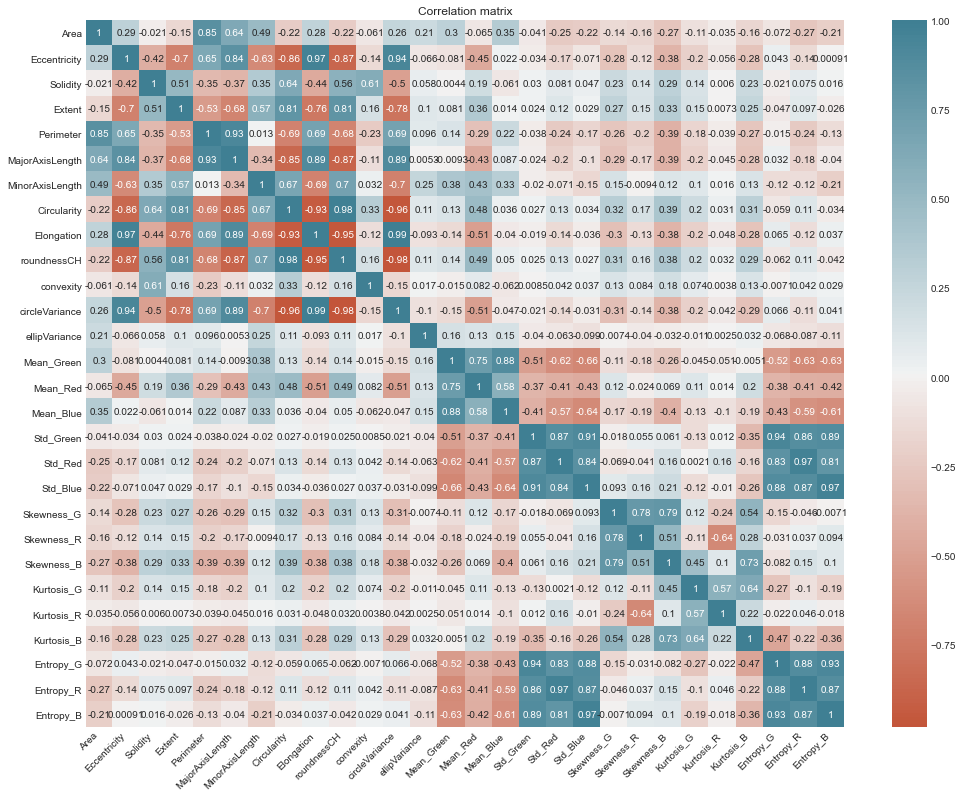

In [136]:
f,ax = plt.subplots(figsize=(17,13))
sns.heatmap(RCB.corr(),cmap = sns.diverging_palette(20, 220, n=200), annot=True, cbar=True )
ax.set_title('Correlation matrix')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

plt.show()

Con esta matriz observamos que los datos que tienden a tener mayor correlación se encuentran en las primeras 12 variables, por lo cual realizaremos las gráficas unicamente con Area, Eccentricity, Solidity, Extent, Perimeter,
       MajorAxisLength, MinorAxisLength, Circularity, Elongation,
       roundnessCH, convexity, circleVariance

In [137]:
RCB.columns

Index(['etiquetas', 'Area', 'Eccentricity', 'Solidity', 'Extent', 'Perimeter',
       'MajorAxisLength', 'MinorAxisLength', 'Circularity', 'Elongation',
       'roundnessCH', 'convexity', 'circleVariance', 'ellipVariance',
       'Mean_Green', 'Mean_Red', 'Mean_Blue', 'Std_Green', 'Std_Red',
       'Std_Blue', 'Skewness_G', 'Skewness_R', 'Skewness_B', 'Kurtosis_G',
       'Kurtosis_R', 'Kurtosis_B', 'Entropy_G', 'Entropy_R', 'Entropy_B'],
      dtype='object')

<Figure size 1080x1080 with 0 Axes>

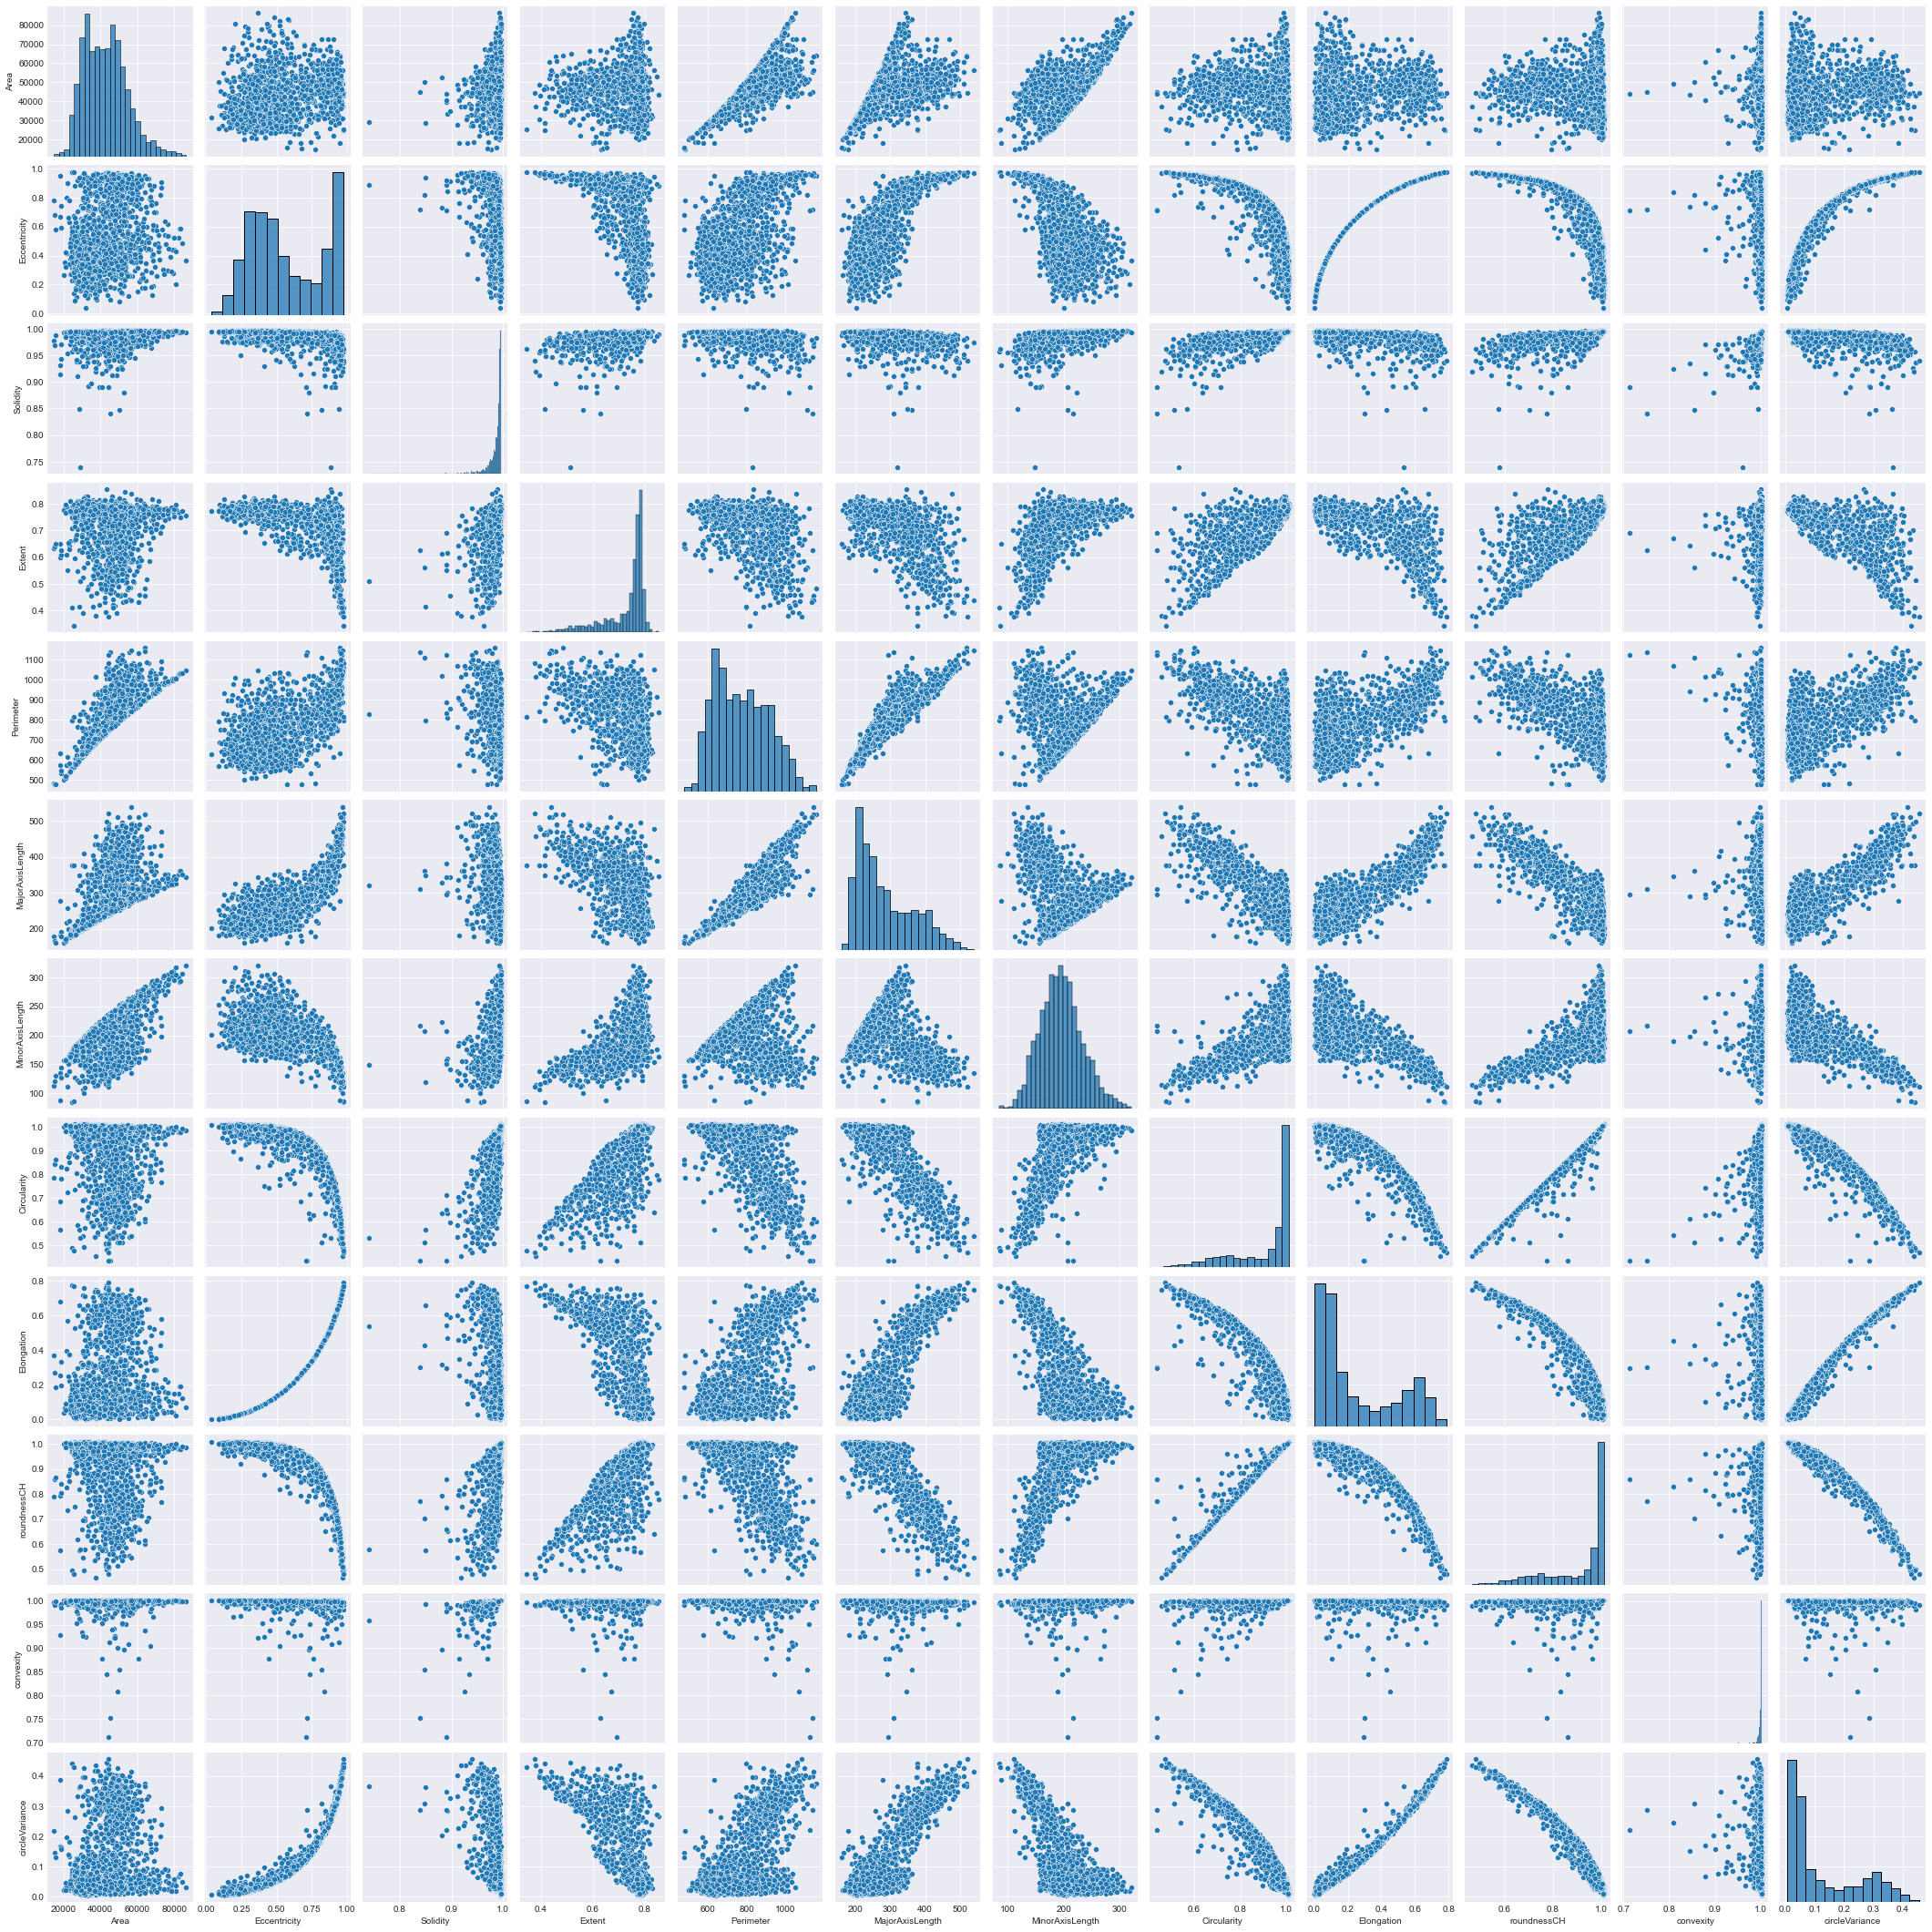

In [55]:
plt.figure(figsize=(15,15))
sns.pairplot(RCB[['Area', 'Eccentricity', 'Solidity', 'Extent', 'Perimeter',
       'MajorAxisLength', 'MinorAxisLength', 'Circularity', 'Elongation',
       'roundnessCH', 'convexity', 'circleVariance']])

Gracias a estas gráficas podemos notar lo marcada que es la correlación, ya que los puntos se agrupan siguiendo patrones específicos, la más correlacionada fue la de Eccentricity con Elongation en donde se logra apreciar una linea curva, estas dos variables presentan una correlación de 0.97.

# División de datos
Dividimos los datos en los conjuntos train y test, siendo y el vector de etiquetas.

In [143]:
eti = RCB[['etiquetas']]

In [144]:
# Dividiendo en training y test
X_train, X_test, y_train, y_test= train_test_split(RCB.iloc[:,1:], eti,test_size=0.30, random_state=42, stratify = eti)

## Regresión logística 

C:\Users\Mafecita\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


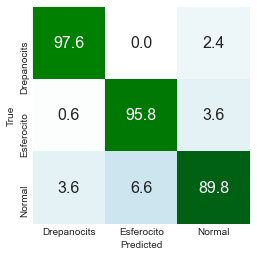

In [145]:
# Creacion del modelo y prediccion con preprocesamiento
scaler = preprocessing.StandardScaler().fit(X_train)
lrmodel = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lrmodel.fit( scaler.transform(X_train),y_train )
y_pred = lrmodel.predict( scaler.transform(X_test) )

# matriz de confusion sin normalizacion
plotCM(y_test.etiquetas.values,y_pred,normalize=True)

In [146]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.94


In [147]:
roc_auc_score(y_test=='Drepanocits',y_pred=='Drepanocits')

0.977336619204089

* Al realizar la matríz de confusión obtuvimos que los drepanocitos fueron correctamente clasificados en un 97.6%, los Esferocitos en un 95.8% y los Normales en un 89.8%, concluimos que para los 3 datos se logro una buena clasificación ya que el porcentaje de etiquetas correctas fue muy alto.
* Con regresión logística obtuvimos una precisión del 94% la cual es muy buena.
* Utilizando la prueba de ROC a la variable de clasificación Drepanocits obtenemos precisión del 97.7% la cual es muy buena también.

##  LDA 

C:\Users\Mafecita\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


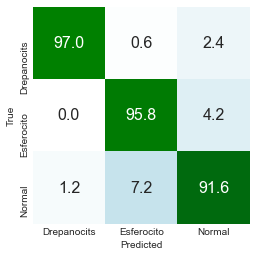

In [148]:
model = LinearDiscriminantAnalysis().fit( X_train, y_train )
y_pred = model.predict(X_test)
plotCM(y_test.etiquetas.values,y_pred,normalize=True)

In [149]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.95


In [150]:
roc_auc_score(y_test=='Drepanocits',y_pred=='Drepanocits')

0.9818364366557139

* Al realizar la matriz de confusión obtuvimos que los drepanocitos fueron correctamente clasificados en un 97%, los Esferocitos en un 95.8% y los Normales en un 91.68%, concluimos que para los 3 datos se logró una buena clasificación ya que el porcentaje de etiquetas correctas fue muy alto.
* Con LDA obtuvimos una precisión del 95% la cual es muy buena.
* Utilizando la prueba de ROC a la variable de clasificación Drepanocits obtenemos precisión del 98.2% la cual es muy buena también.

##  QDA 

C:\Users\Mafecita\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


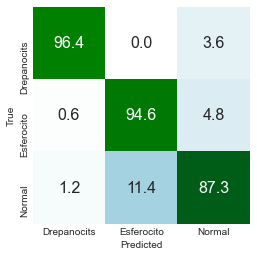

In [151]:
model = QuadraticDiscriminantAnalysis().fit( X_train, y_train )
y_pred = model.predict(X_test)
plotCM(y_test.etiquetas.values,y_pred,normalize=True)

In [152]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.93


In [153]:
roc_auc_score(y_test=='Drepanocits',y_pred=='Drepanocits')

0.9773001095290251

* Al realizar la matriz de confusión obtuvimos que los drepanocitos fueron correctamente clasificados en un 96.4%, los Esferocitos en un 94.6% y los Normales en un 87.3%, concluimos que para los 3 datos se logró una buena clasificación ya que el porcentaje de etiquetas correctas fue muy alto.
* Con QDA obtuvimos una precisión del 93% la cual es muy buena.
* Utilizando la prueba de ROC a la variable de clasificación Drepanocits obtenemos precisión del 97.7% la cual es muy buena también.

##   KNN  

Primero realizamos un for para observar cual es el número de vecinos que logra una mejor predicción del modelo KNN.

In [154]:
acc=[]
for i in range(20):
    model = KNeighborsClassifier(n_neighbors=i+1).fit( X_train, y_train )
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test.etiquetas.values,y_pred))

<ipython-input-154-6bc53e22bce1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model = KNeighborsClassifier(n_neighbors=i+1).fit( X_train, y_train )
<ipython-input-154-6bc53e22bce1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model = KNeighborsClassifier(n_neighbors=i+1).fit( X_train, y_train )
<ipython-input-154-6bc53e22bce1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model = KNeighborsClassifier(n_neighbors=i+1).fit( X_train, y_train )
<ipython-input-154-6bc53e22bce1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model = KNeigh

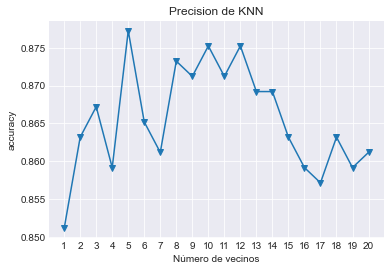

In [155]:
plt.plot(range(1,21), acc, '-v')
plt.xlabel('Número de vecinos')
plt.ylabel('accuracy')
plt.title('Precision de KNN')
plt.xticks(range(1,21))
plt.show()

Teniendo en cuenta la gráfica observamos que el mejor número de vecinos que se puede utilizar es 5.

<ipython-input-156-66e19373a607>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model = KNeighborsClassifier(n_neighbors=5).fit( X_train, y_train )


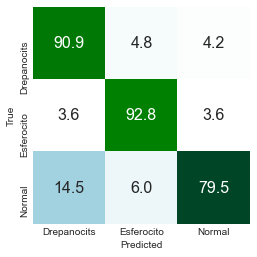

In [156]:
model = KNeighborsClassifier(n_neighbors=5).fit( X_train, y_train )
y_pred = model.predict(X_test)
plotCM(y_test.etiquetas.values,y_pred, normalize=True)

In [157]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.88


In [158]:
roc_auc_score(y_test=='Drepanocits',y_pred=='Drepanocits')

0.9093647316538883

* Al realizar la matriz de confusión obtuvimos que los drepanocitos fueron correctamente clasificados en un 90.9%, los Esferocitos en un 92.8% y los Normales en un 79.5%, concluimos que para los 3 datos se logró una buena clasificación ya que el porcentaje de etiquetas correctas fue muy alto, sin embargo, comparando con los otros modelos hay una disminución en los porcentajes más notoria.
* Con KNN obtuvimos una precisión del 88% la cual es muy buena, pero es la más baja que hemos obtenido.
* Utilizando la prueba de ROC a la variable de clasificación Drepanocits obtenemos precisión del 90.9% la cual es muy buena, pero también es una precisión más baja a comparación de los anteriores.

##  Naive Bayes

C:\Users\Mafecita\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


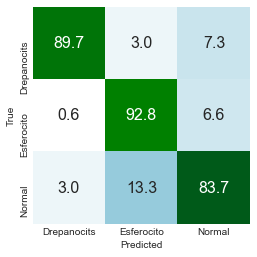

In [159]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test) # Prediccion
plotCM(y_test.etiquetas.values,y_pred, normalize=True) # Matriz de confusion

In [160]:
print("El accuracy del test es: {:.2f}".format( accuracy_score(y_test,y_pred) ))

El accuracy del test es: 0.89


In [161]:
roc_auc_score(y_test=='Drepanocits',y_pred=='Drepanocits')

0.9394487039065352

* Al realizar la matriz de confusión obtuvimos que los drepanocitos fueron correctamente clasificados en un 89.7%, los Esferocitos en un 92.8% y los Normales en un 83.7%, concluimos que para los 3 datos se logró una buena clasificación ya que el porcentaje de etiquetas correctas fue muy alto, sin embargo, comparando con los otros modelos hay una disminución en los porcentajes más notoria al igual que ocurre con KNN, ambos modelos presentaron porcentajes similares y mas bajos.
* Con Naive Bayes obtuvimos una precisión del 89% la cual es muy buena, pero es tan baja como la de KNN.
* Utilizando la prueba de ROC a la variable de clasificación Drepanocits obtenemos precisión del 93.9% la cual es muy buena, pero también es menor que las anteriores a excepcion de KNN.

# Conclusión

Uno de los mejores modelos para calcular la clasificacion fue el LDA, ya que presentó una exactitud de 95% y utilizando la prueba de ROC a la variable de clasificacion Drepanocits obtenemos una precision del 98%. Sin embargo, las demas clasificaciones también obtuvieron porcentajes de exactitud altos, siendo las de KNN y Bayes las mas bajas pero igualmente buenas.